# Udemy 【한글자막】머신러닝의 모든 것 with Python, R


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Support Vector Regression (SVR)
## 직급 수준에 맞는 급여 예측

> - 강의 82 - SVR 1단계
- 강의 83 - SVR 2단계
- 강의 84 - SVR 3단계
- 강의 85 - SVR 4단계
- 강의 86 - SVR 5단계

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [101]:
dataset = pd.read_csv('/content/drive/MyDrive/UDEMY/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression(회귀)/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [102]:
dataset.info()
print('=============================')
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


Position    0
Level       0
Salary      0
dtype: int64

In [103]:
type(dataset['Level'].values), type(dataset.iloc[:, 1:-1].values)

(numpy.ndarray, numpy.ndarray)

In [104]:
type(dataset['Salary'].values), type(dataset.iloc[:, -1].values)

(numpy.ndarray, numpy.ndarray)

In [105]:
# 강의 코드

X = dataset.iloc[:, 1:-1].values
print(X)
# X는 2차원
print('===============')
y = dataset.iloc[:, -1].values
print(y)
# y는 1차원
# 표준화를 위해서 배열 동일하게 설정
print('===============')
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [106]:
X1 = dataset['Level'].values
y1 = dataset['Salary'].values
print(X1)
print(y1)
print('****************')

# 2차원 배열 
# resahpe(행숫자, 열숫자)
X1 = X1.reshape(len(X1),1)
y1 = y1.reshape(len(y1),1)
print(X1)
print('===============')
print(y1)

[ 1  2  3  4  5  6  7  8  9 10]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
****************
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [9]:
# 훈련, 테스트 세트 나누지 않음.
# 최대 데이터를 극대화 해서 관계성을 파악하기 위함.
# 직급, 급여 사이 관계

In [107]:
from sklearn.preprocessing import StandardScaler

# X1 = Level
sc_X1 = StandardScaler()
X1 = sc_X1.fit_transform(X1)

# y1 = Salary
sc_y1 = StandardScaler()
y1 = sc_y1.fit_transform(y1)

In [108]:
print(X1)
print('===============')
print(y1)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [109]:
from sklearn.svm import SVR
# 회귀 서포트 백터 → 회귀 변수
# SVR(범주 kernel = '문자열') 방사형 기본 함수 커널 RBF
regressor = SVR(kernel = 'rbf')

#훈련
regressor.fit(X1, y1)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [110]:
# 예측
# 2차원 배열로 되어 있음
regressor.predict([[6.5]])

array([0.01158103])

In [112]:
# 스케일링 되어 있는걸 다시 돌려서 값을 예측하기.
regressor.predict(sc_X1.transform([[6.5]]))

array([-0.27861589])

In [117]:
# 역변환 inverse_transform()

# sc_y1.inverse_transform(regressor.predict(sc_X1.transform([[6.5]])))
# ↑ Expected 2D array, got 1D array instead: 오류

sc_y1.inverse_transform([regressor.predict(sc_X1.transform([[6.5]]))])

array([[170370.0204065]])

In [139]:
# 또는
sc_y1.inverse_transform(regressor.predict(sc_X1.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

|Position|Level|Salary|
|---|---|---|
|Business Analyst|1|45000|
|Junior Consultant|2|50000|
|Senior Consultant|3|60000|
|Manager|4|80000|
|Country Manager|5|110000|
|Region Manager|6|150000|
|Partner|7|200000|
|Senior Partner|8|300000|
|C-level|9|500000|
|CEO|10|1000000|

#### 다항 회귀 예측값 
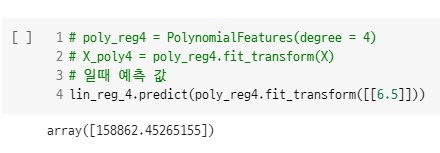

In [126]:
# SVR 모형이 더 잘 들어 맞는다는걸 확인할 수 있음..?

## Visualising the SVR results

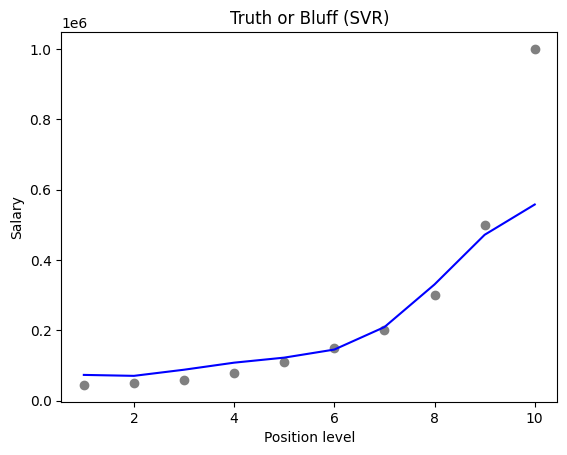

In [144]:
# 실제 급여 산점도도
plt.scatter(sc_X1.inverse_transform(X1), sc_y1.inverse_transform(y1), color = 'gray')
plt.plot(sc_X1.inverse_transform(X1), sc_y1.inverse_transform(regressor.predict(X1).reshape(-1,1)), color = 'blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

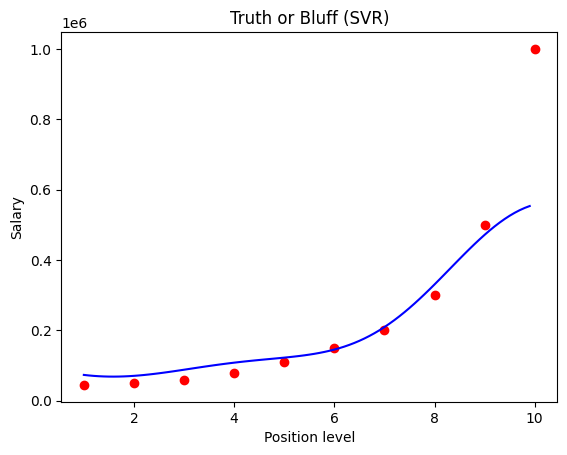

In [155]:
X_grid = np.arange(min(sc_X1.inverse_transform(X1)), max(sc_X1.inverse_transform(X1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X1.inverse_transform(X1), sc_y1.inverse_transform(y1), color = 'red')

plt.plot(X_grid, sc_y1.inverse_transform(regressor.predict(sc_X1.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# 배열배열배열 reshape reshape 에러 코드 읽어보면서 하자 
# 위치 확인하자 reshape 위치위치위치!!!!!!!!